In [68]:
#IMPORTING RELEVANT LIBRARIES.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#IMPORTING THE DATA FROM KAGGLE USING` API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d liujiaqi/hr-comma-sepcsv

!unzip hr-comma-sepcsv.zip

data = pd.read_csv('HR_comma_sep.csv')


Dataset URL: https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv
License(s): CC0-1.0
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 57.6MB/s]
Archive:  hr-comma-sepcsv.zip
  inflating: HR_comma_sep.csv        


In [11]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Preprocess the data (e.g., handle missing values, normalize or scale features, encode categorical variables).

In [13]:
# Checking for missing values
data.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [14]:
# No missing values

In [15]:
# Drop duplicate entries and reset index
data.drop_duplicates(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [16]:
# Duplicates removed

In [17]:
# Discrepancy in column name in dataset and description
# Renaming
data.rename(columns={'sales': 'Department'}, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [19]:
#  Classify each column as numerical, ordinal, categorical
"""
 0   satisfaction_level     11991 non-null  float64   ----- DND
 1   last_evaluation        11991 non-null  float64   ----- DND
 2   number_project         11991 non-null  int64     ----- CND
 3   average_montly_hours   11991 non-null  int64     ----- CND
 4   time_spend_company     11991 non-null  int64     ----- CND
 5   Work_accident          11991 non-null  int64     ----- Categorical
 6   left                   11991 non-null  int64     ----- Categorical
 7   promotion_last_5years  11991 non-null  int64     ----- Categorical
 8   Department             11991 non-null  object    ----- Categorical
 9   salary                 11991 non-null  object    ----- Ordinal
 """

'\n 0   satisfaction_level     11991 non-null  float64   ----- DND\n 1   last_evaluation        11991 non-null  float64   ----- DND\n 2   number_project         11991 non-null  int64     ----- CND\n 3   average_montly_hours   11991 non-null  int64     ----- CND\n 4   time_spend_company     11991 non-null  int64     ----- CND\n 5   Work_accident          11991 non-null  int64     ----- Categorical\n 6   left                   11991 non-null  int64     ----- Categorical\n 7   promotion_last_5years  11991 non-null  int64     ----- Categorical\n 8   Department             11991 non-null  object    ----- Categorical\n 9   salary                 11991 non-null  object    ----- Ordinal\n '

DND

In [20]:
"""
0   satisfaction_level     11991 non-null  float64   ----- DND --- +ve allowed, -ve not allowed, decimal allowed
1   last_evaluation        11991 non-null  float64   ----- DND --- +ve allowed (0-1), -ve not allowed, decimal allowed
"""

'\n0   satisfaction_level     11991 non-null  float64   ----- DND --- +ve allowed, -ve not allowed, decimal allowed\n1   last_evaluation        11991 non-null  float64   ----- DND --- +ve allowed (0-1), -ve not allowed, decimal allowed\n'

In [21]:
data.loc[(data.satisfaction_level < 0) | (data.satisfaction_level > 1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [22]:
data.loc[(data.last_evaluation < 0) | (data.last_evaluation > 1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


CND

In [23]:
"""
 2   number_project         11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected
 3   average_montly_hours   11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected
 4   time_spend_company     11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected
"""

'\n 2   number_project         11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected\n 3   average_montly_hours   11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected\n 4   time_spend_company     11991 non-null  int64     ----- CND --- +ve allowed, -ve not allowed, integer expected\n'

In [24]:
data.loc[(data.number_project < 0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [25]:
data.loc[(data.average_montly_hours < 0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [26]:
data.loc[(data.time_spend_company < 0)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


CATEGORICAL

In [27]:
"""
 5   Work_accident          11991 non-null  int64     ----- Categorical
 6   left                   11991 non-null  int64     ----- Categorical
 7   promotion_last_5years  11991 non-null  int64     ----- Categorical
 8   Department             11991 non-null  object    ----- Categorical
 """

'\n 5   Work_accident          11991 non-null  int64     ----- Categorical\n 6   left                   11991 non-null  int64     ----- Categorical\n 7   promotion_last_5years  11991 non-null  int64     ----- Categorical\n 8   Department             11991 non-null  object    ----- Categorical\n '

In [28]:
data.Work_accident.unique() , data.left.unique(), data.Department.unique(), data.promotion_last_5years.unique() ,

(array([0, 1]),
 array([1, 0]),
 array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array([0, 1]))

ORDINAL

In [29]:
# 9   salary                 11991 non-null  object    ----- Ordinal

In [30]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [31]:
# Encoding categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

dummy_Dep=pd.get_dummies(data.Department).astype(int)
dummy_sal=pd.get_dummies(data.salary).astype(int)

final=pd.concat((data.drop(columns=["Department","salary"]),dummy_Dep,dummy_sal),axis = 1)

Numeric Columns: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')
Categorical Columns: Index(['Department', 'salary'], dtype='object')


In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   IT                     11991 non-null  int64  
 9   RandD                  11991 non-null  int64  
 10  accounting             11991 non-null  int64  
 11  hr                     11991 non-null  int64  
 12  management             11991 non-null  int64  
 13  marketing              11991 non-null  int64  
 14  product_mng            11991 non-null  int64  
 15  sales  

# Train a machine learning model using an appropriate algorithm (e.g., Decision Trees, Random Forests, SVM, XGBoost, or a neural network).
# Evaluate the model’s performance using relevant metrics (e.g., accuracy, RMSE, precision/recall, F1-score).

In [34]:
# Seperate data as features and label
label = final.iloc[:,6]
features = final.drop("left",axis = 1)

In [35]:
# Splitting data into train and test in the ratio 80:20 with random_state=123.

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size = 0.2, random_state = 123)

In [36]:
 # Upsample the train dataset using the SMOTE technique
Y_train.value_counts()

,count
left,
0,7991
1,1601


In [37]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((9592, 20), (9592,), (2399, 20), (2399,))

In [38]:
# Highly unbalanced dataset
# Apply SMOTE
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state = 123)
X_train_resampled,Y_train_resampled = smote.fit_resample(X_train,Y_train)

In [40]:
Y_train_resampled.value_counts()

,count
left,
0,7991
1,7991


# Training a logistic regression model, applying a 5-fold CV, and plotting the classification report

In [42]:
#Train a logistic regression model, applying a 5-fold CV, and plotting the classification report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_logistic = LogisticRegression(max_iter=2000,random_state = 123)
model_logistic.fit(X_train_resampled,Y_train_resampled)

scores_logistic = cross_val_score(model_logistic,features,label,cv=5)

In [43]:
scores_logistic

array([0.84535223, 0.83361134, 0.84028357, 0.83778148, 0.75104254])

In [44]:
# Benchmark Score
print("Minimum Threshold score (CL) : ", scores_logistic.mean())
print("Suggested SL value for the given dataset is ", 1 - scores_logistic.mean())

Minimum Threshold score (CL) :  0.8216142325079152
Suggested SL value for the given dataset is  0.1783857674920848


In [45]:
#  Benchmark Score
print("Minimum Threshold score (CL) : ", scores_logistic.min())
print("Suggested SL value for the given dataset is ", 1 - scores_logistic.min())

Minimum Threshold score (CL) :  0.7510425354462051
Suggested SL value for the given dataset is  0.24895746455379486


In [47]:
# Creating classification report
from sklearn.metrics import classification_report
print(classification_report(label,model_logistic.predict(features)))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     10000
           1       0.46      0.61      0.52      1991

    accuracy                           0.82     11991
   macro avg       0.69      0.73      0.71     11991
weighted avg       0.84      0.82      0.83     11991



# Training Random Forest Classifier model, applying the 5-fold CV, and plotting the classification report


In [48]:
from sklearn.ensemble import RandomForestClassifier

model_RandomF = RandomForestClassifier(random_state = 123)
model_RandomF.fit(X_train_resampled,Y_train_resampled)

scores_RandomF = cross_val_score(model_RandomF,features,label,cv=5)

In [49]:
scores_RandomF

array([0.98624427, 0.97998332, 0.98457048, 0.98331943, 0.97998332])

In [50]:
# Benchmark Score
print("Minimum Threshold score (CL) : ", scores_RandomF.mean())
print("Suggested SL value for the given dataset is ", 1 - scores_RandomF.mean())

Minimum Threshold score (CL) :  0.9828201631135576
Suggested SL value for the given dataset is  0.017179836886442423


In [51]:
#  Benchmark Score
print("Minimum Threshold score (CL) : ", scores_RandomF.min())
print("Suggested SL value for the given dataset is ", 1 - scores_RandomF.min())

Minimum Threshold score (CL) :  0.9799833194328608
Suggested SL value for the given dataset is  0.020016680567139233


In [53]:
# Creating classification report
from sklearn.metrics import classification_report
print(classification_report(label,model_RandomF.predict(features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       0.99      0.99      0.99      1991

    accuracy                           1.00     11991
   macro avg       0.99      0.99      0.99     11991
weighted avg       1.00      1.00      1.00     11991



# Training a Gradient Boosting Classifier model, applying the 5-fold CV, and plotting the classification report.

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBoost = GradientBoostingClassifier(random_state = 123)
model_GBoost.fit(X_train_resampled,Y_train_resampled)

scores_GBoost = cross_val_score(model_GBoost,features,label,cv=5)

In [55]:
scores_GBoost

array([0.98541059, 0.97581318, 0.98040033, 0.97956631, 0.97414512])

In [56]:
# Benchmark Score
print("Minimum Threshold score (CL) : ", scores_GBoost.mean())
print("Suggested SL value for the given dataset is ", 1 - scores_GBoost.mean())

Minimum Threshold score (CL) :  0.9790671050385533
Suggested SL value for the given dataset is  0.02093289496144668


In [57]:
#  Benchmark Score
print("Minimum Threshold score (CL) : ", scores_GBoost.min())
print("Suggested SL value for the given dataset is ", 1 - scores_GBoost.min())

Minimum Threshold score (CL) :  0.9741451209341118
Suggested SL value for the given dataset is  0.025854879065888237


In [58]:
# Creating classification report
from sklearn.metrics import classification_report
print(classification_report(label,model_GBoost.predict(features)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10000
           1       0.89      0.94      0.91      1991

    accuracy                           0.97     11991
   macro avg       0.94      0.96      0.95     11991
weighted avg       0.97      0.97      0.97     11991



# ROC-AUC score

In [62]:
model_logistic.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [63]:
model_logistic.predict_proba(X_test)

array([[0.91420007, 0.08579993],
       [0.49697685, 0.50302315],
       [0.86271237, 0.13728763],
       ...,
       [0.96897567, 0.03102433],
       [0.3536205 , 0.6463795 ],
       [0.9670781 , 0.0329219 ]])

In [64]:
# Import ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [65]:
# Step 1 - Extract prob value of 1
probability_Logistic = model_logistic.predict_proba(X_test)[:,1]

In [66]:
# Step 2 - Calculate AUC
auc_Logistic = roc_auc_score(Y_test,probability_Logistic)

0.8099398858980741


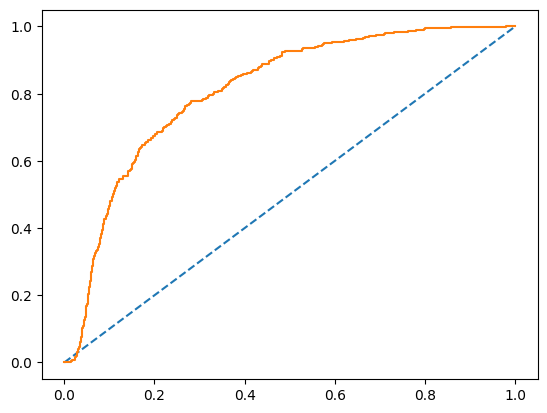

In [69]:
# Step 3 - Plot skill line (0,0),(1,1)
skill_line_plot= plt.plot([0,1],[0,1],linestyle="--")

# Step 4 Plot ROC
fpr1,tpr1,_ = roc_curve(Y_test,probability_Logistic)
plt.plot(fpr1,tpr1)
print(auc_Logistic)

In [70]:
model_RandomF.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
model_RandomF.predict_proba(X_test)

array([[0.96, 0.04],
       [0.82, 0.18],
       [0.75, 0.25],
       ...,
       [0.98, 0.02],
       [0.93, 0.07],
       [1.  , 0.  ]])

In [72]:
# Step 1 - Extract prob value of 1
probability_RandomF = model_RandomF.predict_proba(X_test)[:,1]

In [73]:
# Step 2 - Calculate AUC
auc_RandomF = roc_auc_score(Y_test,probability_RandomF)

0.9851284603897844


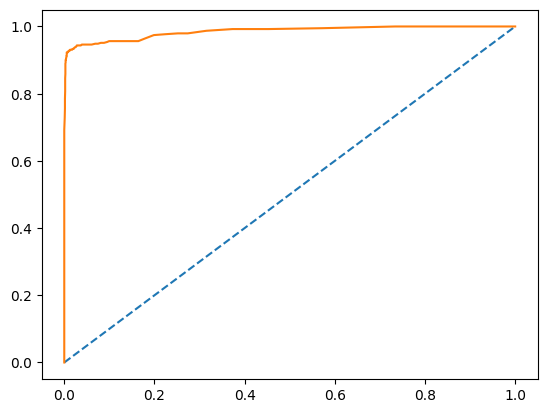

In [74]:
# Step 3 - Plot skill line (0,0),(1,1)
skill_line_plot= plt.plot([0,1],[0,1],linestyle="--")

# Step 4 Plot ROC
fpr2,tpr2,_ = roc_curve(Y_test,probability_RandomF)
plt.plot(fpr2,tpr2)
print(auc_RandomF)

In [75]:
model_GBoost.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
model_GBoost.predict_proba(X_test)

array([[0.93241551, 0.06758449],
       [0.94245278, 0.05754722],
       [0.85204061, 0.14795939],
       ...,
       [0.97876844, 0.02123156],
       [0.86121473, 0.13878527],
       [0.97897741, 0.02102259]])

In [77]:
# Step 1 - Extract prob value of 1
probability_GBoost = model_GBoost.predict_proba(X_test)[:,1]

In [78]:
# Step 2 - Calculate AUC
auc_GBoost = roc_auc_score(Y_test,probability_GBoost)

0.9860091128383811


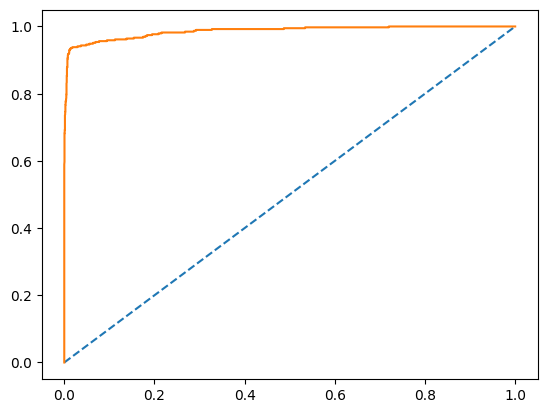

In [79]:
# Step 3 - Plot skill line (0,0),(1,1)
skill_line_plot= plt.plot([0,1],[0,1],linestyle="--")

# Step 4 Plot ROC
fpr3,tpr3,_ = roc_curve(Y_test,probability_GBoost)
plt.plot(fpr3,tpr3)
print(auc_GBoost)

# Confusion matrix

In [80]:
# Logistic Regression
from sklearn.metrics import confusion_matrix
confusion_matrix(label,model_logistic.predict(features))

array([[8585, 1415],
       [ 783, 1208]])

In [81]:
# RandomForest Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(label,model_RandomF.predict(features))

array([[9981,   19],
       [  29, 1962]])

In [82]:
# Gradient Boosting Classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(label,model_GBoost.predict(features))

array([[9779,  221],
       [ 129, 1862]])

In [84]:
# Using the cross validation metric, Random Forest Classifier is the best model.
# RandomForest Classifier has lowest SL value, which implies it will give model with lowest error rate.

In [83]:
# Using the ROC/AUC metric, Random Forest Classifier is the best model.
# RandomForest Classifier has highest AUC score.

In [85]:
# Using recall, accracy and F1 score, Random Forest Classifier is the best model.
# # RandomForest Classifier has highest recall, accracy and F1 score.

In [86]:
# Hence, using the above evaluation metrics, RandomForestClassifier is the best model to predict employee turover.

In [87]:
# Predicting the probability of employee turnover in the test data.
probabilities = model_RandomF.predict_proba(X_test)

employee_turnover_percentages = (probabilities[:, 1] * 100).astype(int)
print(employee_turnover_percentages)


[ 4 18 25 ...  2  7  0]


# Save the trained model (e.g., as a .pkl, .h5, or other appropriate format).

In [88]:
import pickle

# Saving the model as a .pkl file
with open('model_RandomF.pkl', 'wb') as file:
    pickle.dump(model_RandomF, file)


total 14M
-rw-r--r-- 1 root root 554K Sep 26  2019 HR_comma_sep.csv
-rw-r--r-- 1 root root 111K Sep 26  2019 hr-comma-sepcsv.zip
-rw-r--r-- 1 root root  13M Feb 13 15:59 model_RandomF.pkl
drwxr-xr-x 1 root root 4.0K Feb 11 14:27 sample_data


In [89]:
from google.colab import files
files.download('model_RandomF.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Versioning: Implement model versioning, ensuring that each new model trained is tagged with a version number to track improvements over time.


In [90]:
import os

# Step 1: Determine the next version number
model_name = 'model_RandomF'
version = 1

# Check for existing versions
while os.path.exists(f'{model_name}_v{version}.pkl'):
    version += 1

# Step 2: Save the model with the version number
model_filename = f'{model_name}_v{version}.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_RandomF, file)

print(f'Model saved as: {model_filename}')

# Step 3: List all versioned models to track history
!ls -lh | grep model_RandomF


Model saved as: model_RandomF_v1.pkl
-rw-r--r-- 1 root root  13M Feb 13 15:59 model_RandomF.pkl
-rw-r--r-- 1 root root  13M Feb 13 16:01 model_RandomF_v1.pkl
